In [1]:
import pyforest

In [1]:
titanic=pd.read_csv(r"C:\Users\sures\OneDrive\Desktop\projects\Titanic-Train-Data.csv")
titanic

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [7]:
titanic['Age'].median()

28.0

In [9]:
titanic['Age'].isnull().sum()


177

In [10]:
titanic['Age']=titanic['Age'].interpolate()
titanic.Age.isnull().sum()

0

In [11]:
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (titanic.shape[0] 
                                - missing_df['missing_count']) / titanic.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,Cabin,687,22.895623
1,Embarked,2,99.775533
2,PassengerId,0,100.000000
3,Survived,0,100.000000
4,Pclass,0,100.000000
5,Name,0,100.000000
6,Sex,0,100.000000
7,Age,0,100.000000
8,SibSp,0,100.000000
9,Parch,0,100.000000


In [12]:
cols = ['Name','Ticket','Cabin','PassengerId']
titanic_DT= titanic
titanic_DT = titanic_DT.drop(cols,axis=1)
titanic_DT.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
titanic['Survived'].mean()

0.3838383838383838

In [15]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,26.00,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,38.50,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,47.00,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.50,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,20.50,0,0,112052,0.0,NaN,S


In [18]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(titanic_DT[col]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

<IPython.core.display.Javascript object>

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [21]:
titanic_DT = pd.concat((titanic_DT,titanic_dummies),axis=1)
titanic_DT.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,...,Q,S,1,2,3,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,...,0,1,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,...,0,1,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,...,0,1,0,0,1,0,1,0,0,1


In [22]:
titanic_DT = titanic_DT.drop(['Pclass','Sex','Embarked'],axis=1)
titanic_DT.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,...,Q,S,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1


In [23]:
titanic_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
 13  1         891 non-null    uint8  
 14  2         891 non-null    uint8  
 15  3         891 non-null    uint8  
 16  female    891 non-null    uint8  
 17  male      891 non-null    uint8  
 18  C         891 non-null    uint8  
 19  Q         891 non-null    uint8  
 20  S         891 non-null    uint8 

In [24]:
titanic_DT['Survived'] = titanic_DT['Survived'].interpolate()
titanic_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
 13  1         891 non-null    uint8  
 14  2         891 non-null    uint8  
 15  3         891 non-null    uint8  
 16  female    891 non-null    uint8  
 17  male      891 non-null    uint8  
 18  C         891 non-null    uint8  
 19  Q         891 non-null    uint8  
 20  S         891 non-null    uint8 

In [25]:
y = titanic_DT['Survived'].values
titanic_DT.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,...,Q,S,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1


In [26]:
titanic1= titanic_DT.drop(['Survived'],1)
X = titanic1.values
titanic1.head()

C:\Users\sures\AppData\Local\Temp/ipykernel_12444/1764751596.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  titanic1= titanic_DT.drop(['Survived'],1)


,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

E:\ramesh\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

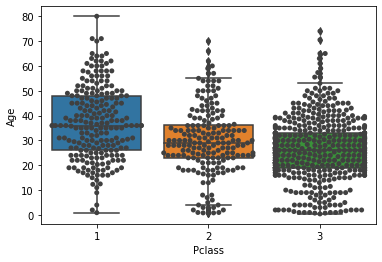

In [27]:
sns.boxplot(x="Pclass", y="Age", data=titanic)
sns.swarmplot(x="Pclass", y="Age", data=titanic, color=".25")

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

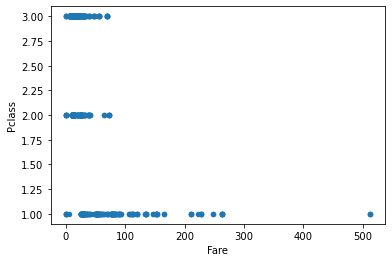

In [28]:
titanic.plot.scatter(x="Fare", y="Pclass")

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Female Survivors'}>

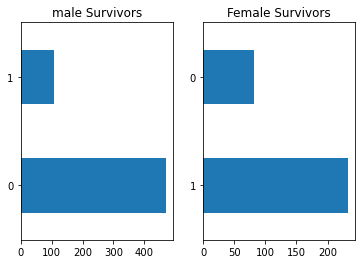

In [29]:
# Womens and mens surviving ratio

fig, axs =plt.subplots(1,2)
titanic[titanic.Sex =='male'].Survived.value_counts().plot(kind='barh',ax=axs[0], title ='male Survivors')
titanic[titanic.Sex =='female'].Survived.value_counts().plot(kind='barh',ax=axs[1], title ='Female Survivors')

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Female  child Survivors'}>

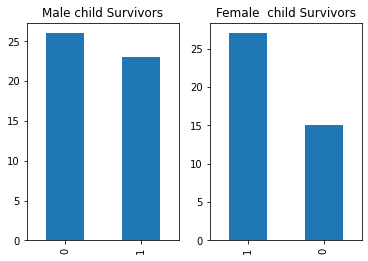

In [30]:
# Male and female survival by their age
fig, axs =plt.subplots(1,2)
titanic[(titanic.Sex =='male') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[0], 
                                                                                  title ='Male child Survivors')
titanic[(titanic.Sex =='female') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[1], 
                                                                                    title ='Female  child Survivors')

In [32]:
titanic[['Pclass', 'Survived','Sex']].groupby(['Pclass','Sex'],
    as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [33]:
titanic['Survived'].mean()

0.3838383838383838

In [34]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 10)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 10)].Survived.mean())

0.5263157894736842 0.6451612903225806


In [36]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 2)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 2)].Survived.mean())

0.6923076923076923 1.0


<IPython.core.display.Javascript object>

array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

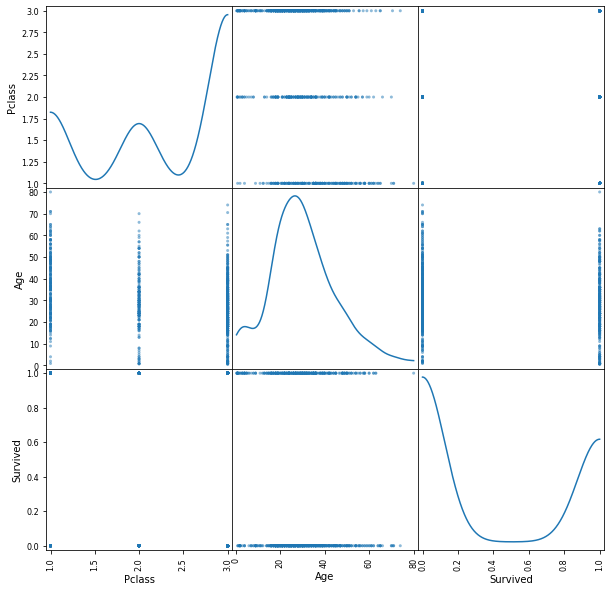

In [37]:
cols=['Pclass','Age','Survived']
pd.plotting.scatter_matrix(titanic[cols], figsize = (10, 10), diagonal = 'kde')